In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Diabetes Prediction

## **Exploratory Data Analysis**

In [3]:
# Importing the packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/FinalYrProject/datasets/diabetes.csv')

In [5]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### The dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [7]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [9]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [10]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

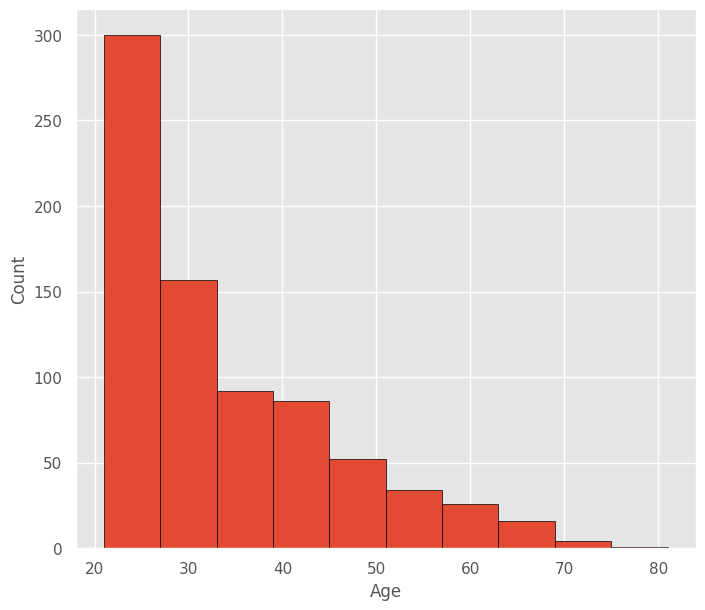

In [11]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [12]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

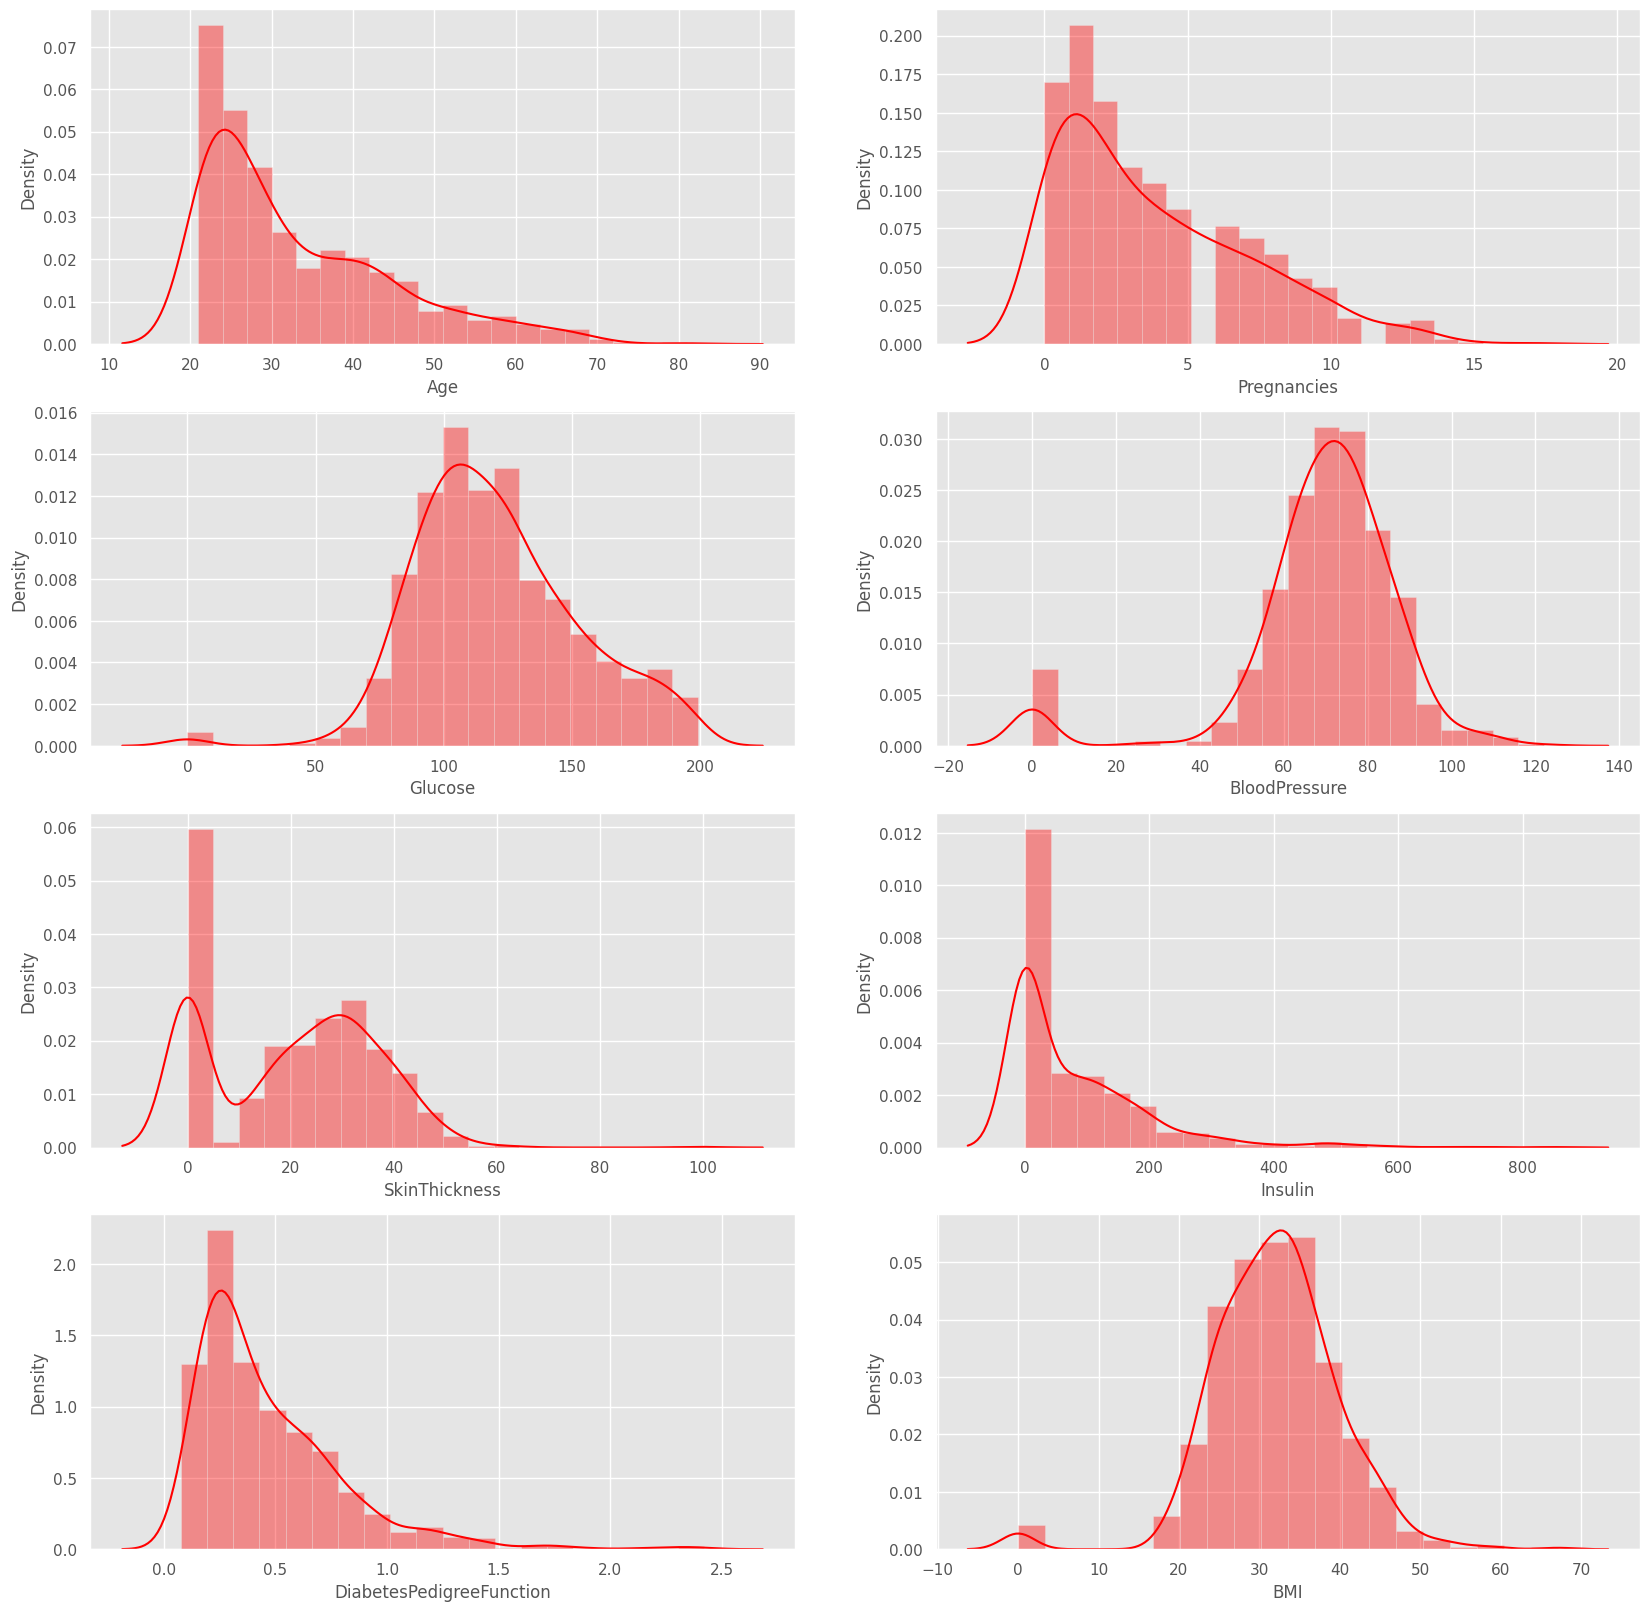

In [13]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="red")
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="red")
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red")
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red")
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red")
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [14]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [15]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [16]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [17]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [18]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [19]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [20]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [21]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


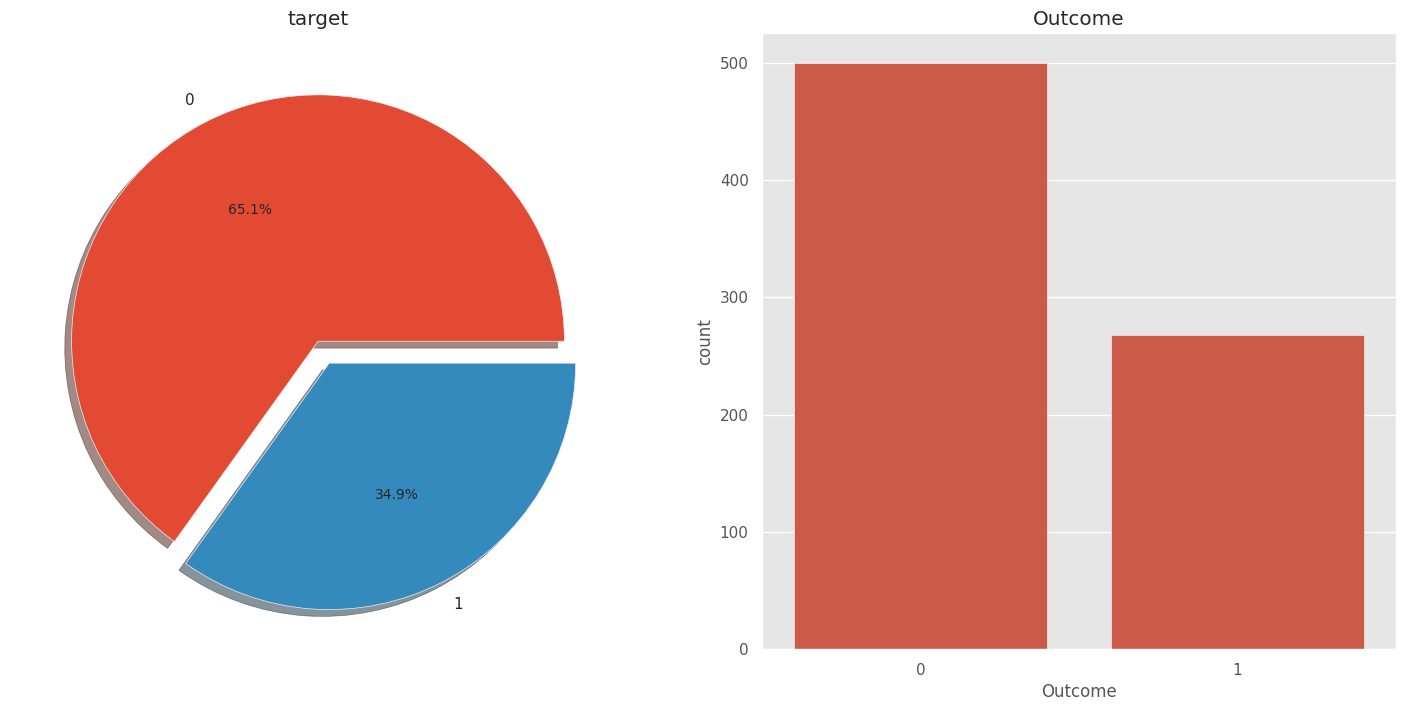

In [22]:
# Visualize the distribution of the outcome variable in the data -> 0 - Healthy, 1 - Diabetic
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [23]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


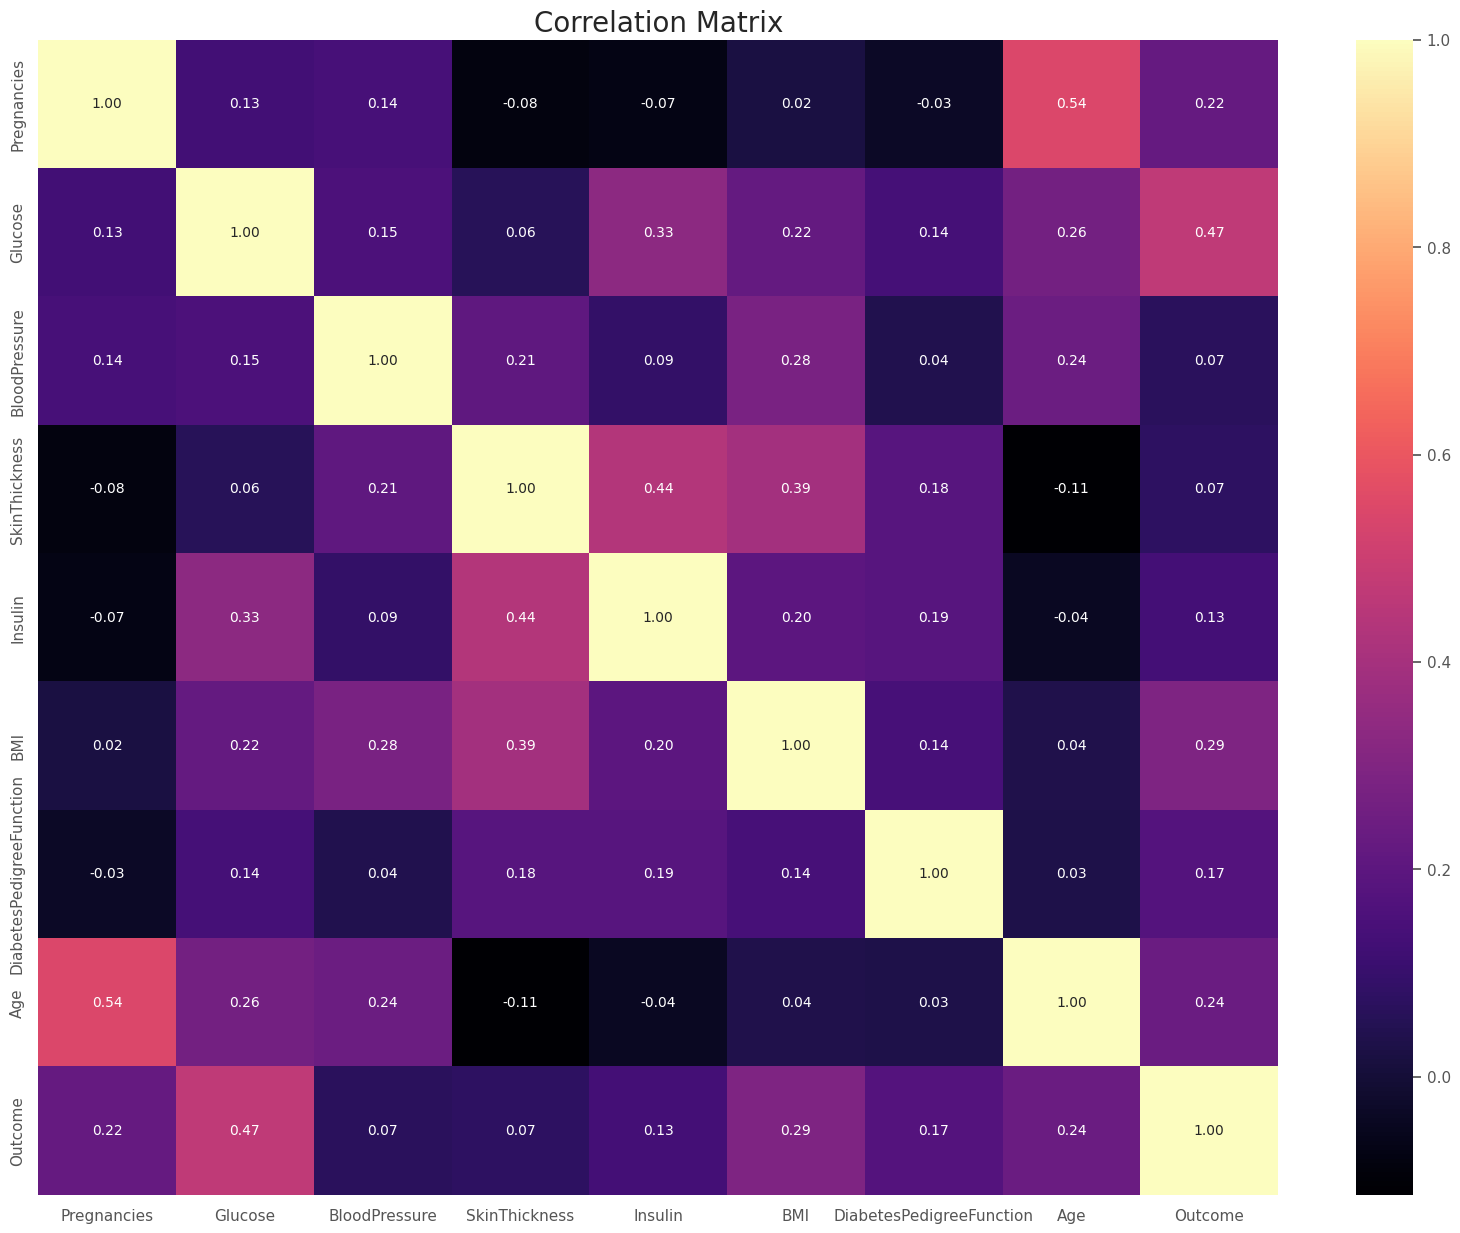

In [24]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

## **Data Preprocessing**

## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [25]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

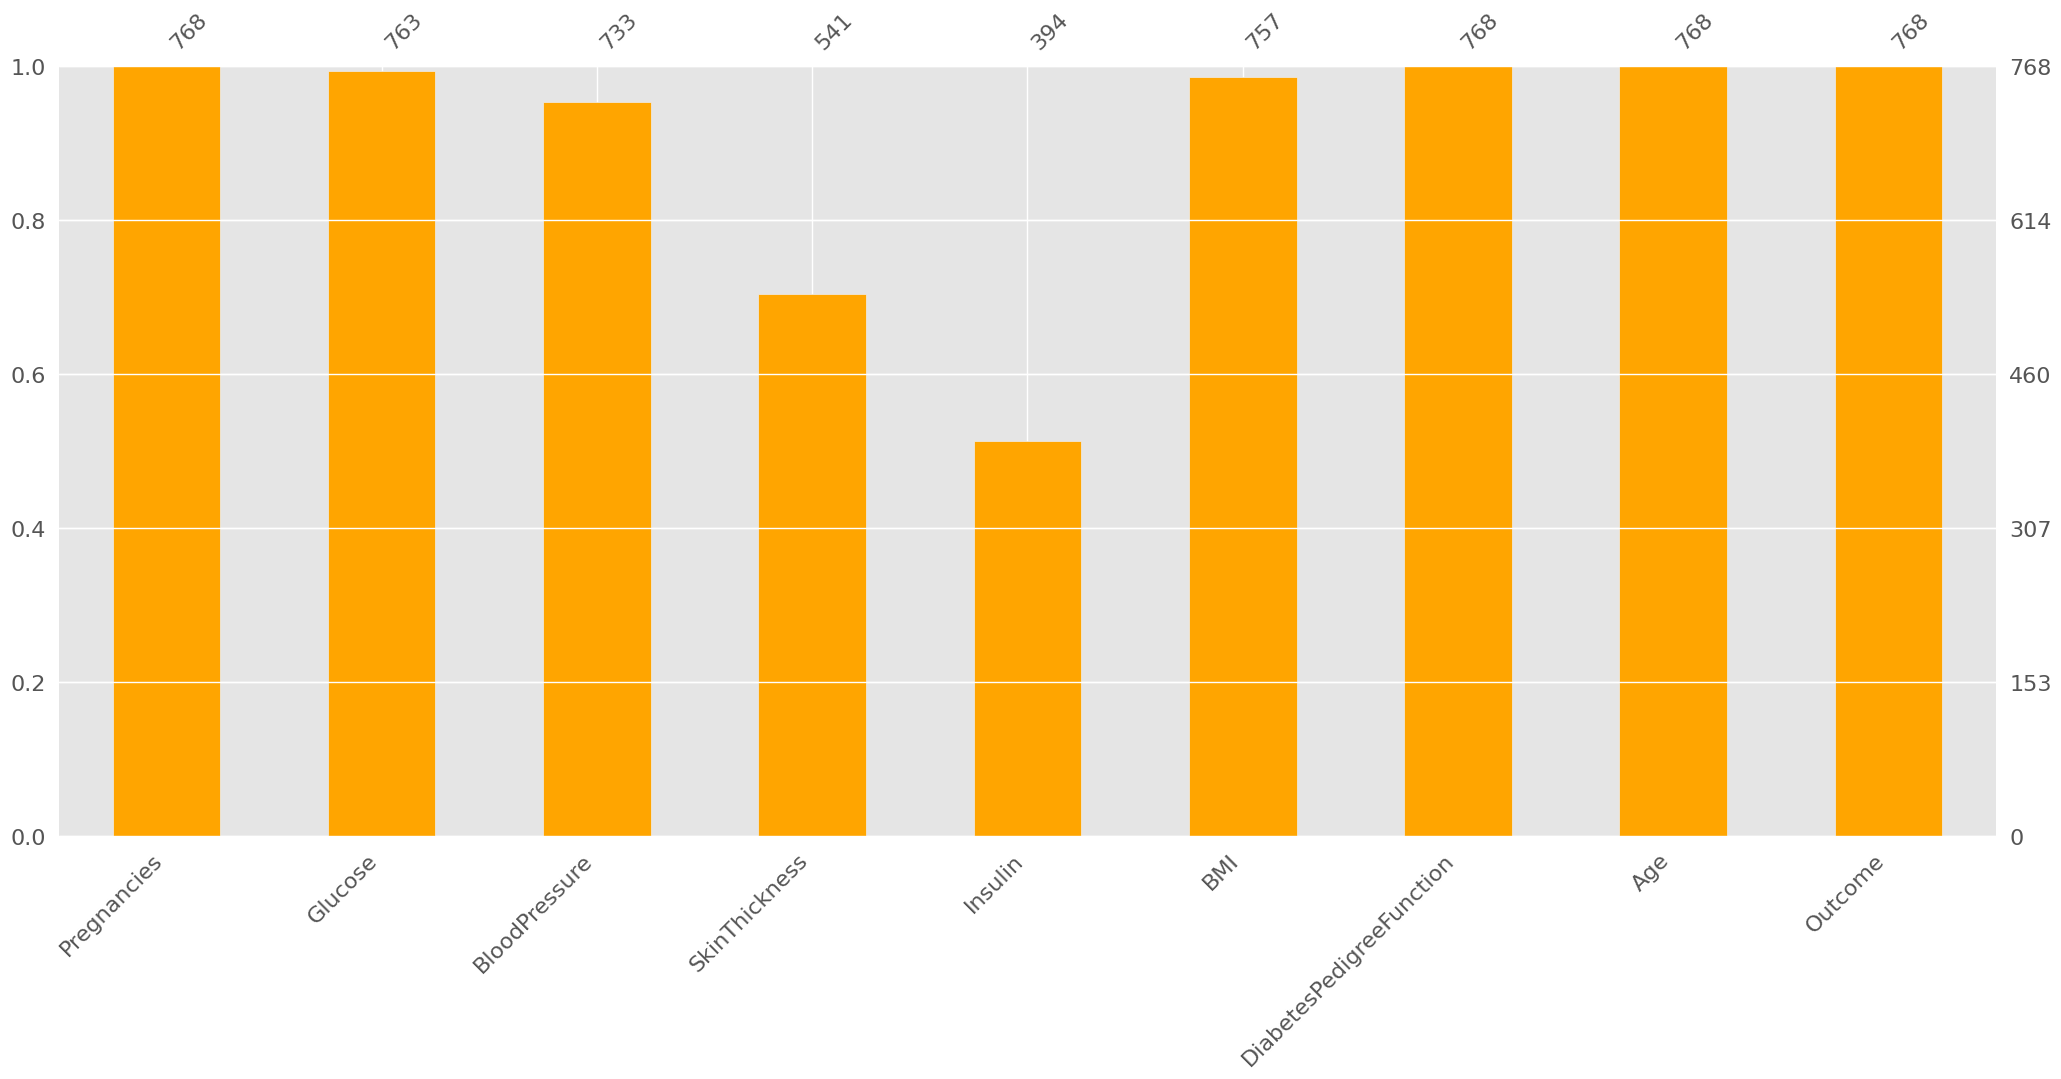

In [28]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(df, color="orange");

In [29]:
# The missing values will be filled with the median values of each variable
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [30]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
# Number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
# splitting data into training and test set

X=df.drop('Outcome',axis=1)
y=df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Logistic Regression

In [34]:
df.shape

(768, 9)

In [35]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# model predictions

y_pred = log_reg.predict(X_test)

In [37]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.7802607076350093
0.7662337662337663


In [38]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[141  16]
 [ 38  36]]


In [39]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.69      0.49      0.57        74

    accuracy                           0.77       231
   macro avg       0.74      0.69      0.71       231
weighted avg       0.76      0.77      0.75       231



# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
# model predictions

y_pred = knn.predict(X_test)

In [42]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8770949720670391
0.8874458874458875


In [43]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[144  13]
 [ 13  61]]


In [44]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       157
           1       0.82      0.82      0.82        74

    accuracy                           0.89       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.89      0.89      0.89       231



# SVM

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [46]:
# best parameters

grid_search.best_params_

{'C': 15, 'gamma': 0.0001}

In [47]:
# best score

grid_search.best_score_

0.8584631360332295

In [48]:
svc = SVC(C = 1, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [49]:
# model predictions

y_pred = svc.predict(X_test)

In [50]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

1.0
0.6796536796536796


In [51]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[157   0]
 [ 74   0]]


In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       157
           1       0.00      0.00      0.00        74

    accuracy                           0.68       231
   macro avg       0.34      0.50      0.40       231
weighted avg       0.46      0.68      0.55       231



# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8441558441558441 

Confusion Matrix :- 
[[143  14]
 [ 22  52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       157
           1       0.79      0.70      0.74        74

    accuracy                           0.84       231
   macro avg       0.83      0.81      0.82       231
weighted avg       0.84      0.84      0.84       231



In [54]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 50, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [55]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.8640000000000001


In [56]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9068901303538175
Test Accuracy of Decision Tree Classifier is 0.8268398268398268 

Confusion Matrix :- 
[[145  12]
 [ 28  46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       157
           1       0.79      0.62      0.70        74

    accuracy                           0.83       231
   macro avg       0.82      0.77      0.79       231
weighted avg       0.82      0.83      0.82       231



# RF

In [57]:
from sklearn.ensemble import RandomForestClassifier

# rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf = RandomForestClassifier(
    criterion='entropy',  # or 'gini', depending on your preference
    max_depth=8,  # Adjusted max_depth for a better fit with fewer features
    max_features='sqrt',  # Adjusted max_features based on the square root of the number of features
    min_samples_leaf=1,  # Adjusted min_samples_leaf
    min_samples_split=2,  # Adjusted min_samples_split
    n_estimators=100  # Adjusted n_estimators, you can try different values
)
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=8)

In [58]:
y_pred = rand_clf.predict(X_test)

In [59]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9925512104283054
0.9090909090909091


In [60]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[148   9]
 [ 12  62]]


In [61]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       157
           1       0.87      0.84      0.86        74

    accuracy                           0.91       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.91      0.91      0.91       231



# GBDT

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [63]:
# best parameters

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}

In [64]:
# best score

grid_search_gbc.best_score_

0.8768343815513628

In [65]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=180)

In [66]:
y_pred = gbc.predict(X_test)

In [67]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.9177489177489178


In [68]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[148   9]
 [ 10  64]]


In [69]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       157
           1       0.88      0.86      0.87        74

    accuracy                           0.92       231
   macro avg       0.91      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231



# XGBoost

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred = xgb.predict(X_test)

In [72]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9813780260707635
0.9264069264069265


In [73]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[152   5]
 [ 12  62]]


In [74]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       157
           1       0.93      0.84      0.88        74

    accuracy                           0.93       231
   macro avg       0.93      0.90      0.91       231
weighted avg       0.93      0.93      0.93       231



# Model Comparison

In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,92.64
5,Gradient Boosting Classifier,91.77
4,Random Forest Classifier,90.91
1,KNN,88.74
3,Decision Tree Classifier,82.68
0,Logistic Regression,76.62
2,SVM,67.97


In [76]:
import pickle
model = xgb
pickle.dump(model, open("/content/drive/MyDrive/FinalYrProject/models/diabetes.sav",'wb'))

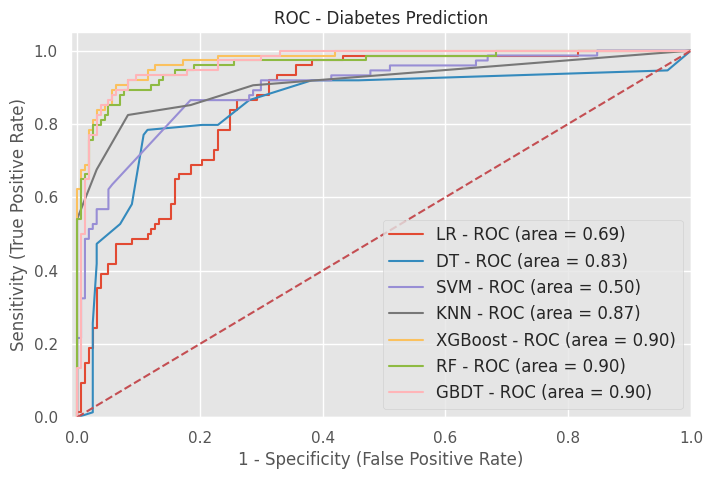

In [77]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("/content/drive/MyDrive/FinalYrProject/images/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[76.62, 82.67999999999999, 67.97, 88.74, 92.64, 90.91, 91.77]
[69.23, 82.98, 50.0, 87.08, 90.3, 90.73, 90.38000000000001]


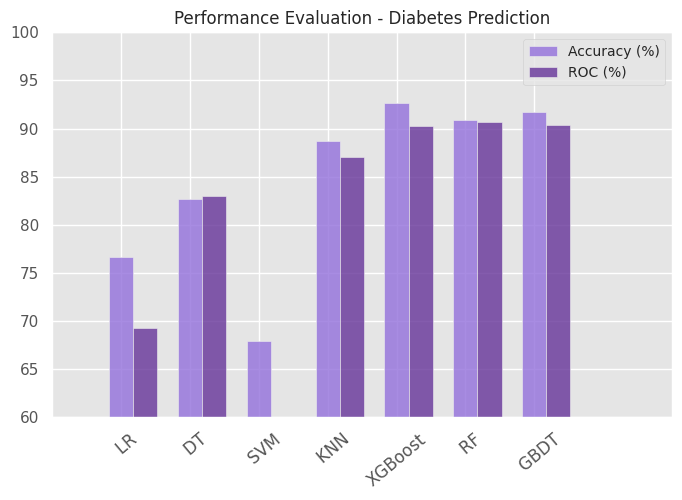

In [78]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 100])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("/content/drive/MyDrive/FinalYrProject/images/PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()